In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA, ARIMA
%matplotlib inline

In [2]:
temp_NY=pd.read_csv('NY_temp.csv')

In [3]:
temp_NY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 2 columns):
DATE    147 non-null int64
TAVG    147 non-null float64
dtypes: float64(1), int64(1)
memory usage: 2.4 KB


In [3]:
temp_NY.head()

,DATE,TAVG
0,1870,53.8
1,1871,51.3
2,1872,51.3
3,1873,50.9
4,1874,51.3


In [7]:
temp_NY=temp_NY.set_index('DATE')

The p-value for the ADF test is  0.583293898787


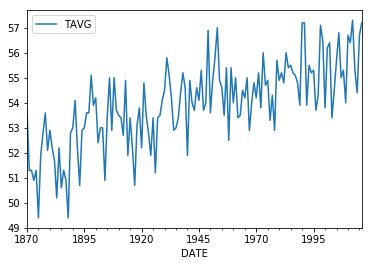

In [8]:
temp_NY.index = pd.to_datetime(temp_NY.index, format='%Y')

temp_NY.plot()

result = adfuller(temp_NY['TAVG'])
print("The p-value for the ADF test is ", result[1])

In [9]:
ts=temp_NY['TAVG']

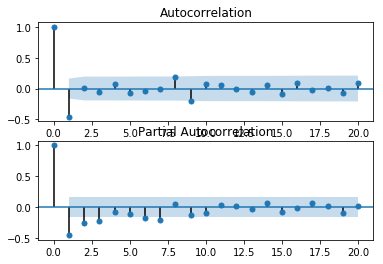

In [9]:
# Take first difference of the temperature Series
chg_temp = temp_NY.diff()
chg_temp = chg_temp.dropna()

# Plot the ACF and PACF on the same page
fig, axes = plt.subplots(2,1)

# Plot the ACF
plot_acf(chg_temp, lags=20, ax=axes[0])

# Plot the PACF
plot_pacf(chg_temp, lags=20, ax=axes[1])
plt.show()

In [10]:
# Fit the data to an AR(1) model and print AIC:
mod = ARMA(chg_temp, order=(1,0))
res = mod.fit()
print("The AIC for an AR(1) is: ", res.aic)

# Fit the data to an AR(2) model and print AIC:
mod = ARMA(chg_temp, order=(2,0))
res = mod.fit()
print("The AIC for an AR(2) is: ", res.aic)

# Fit the data to an MA(1) model and print AIC:
mod = ARMA(chg_temp, order=(0,1))
res = mod.fit()
print("The AIC for an MA(1) is: ", res.aic)

# Fit the data to an ARMA(1,1) model and print AIC:
mod = ARMA(chg_temp, order=(1,1))
res = mod.fit()
print("The AIC for an ARMA(1,1) is: ", res.aic)

The AIC for an AR(1) is:  510.534689831391
The AIC for an AR(2) is:  501.9274123160227
The AIC for an MA(1) is:  469.3909710802131
The AIC for an ARMA(1,1) is:  469.0729118464111


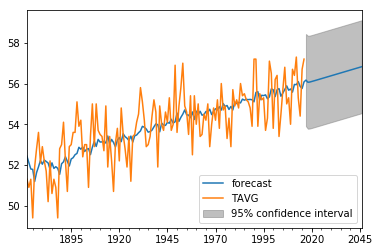

In [11]:
# Forecast interest rates using an AR(1) model
mod = ARIMA(temp_NY, order=(1,1,1))
res = mod.fit()

# Plot the original series and the forecasted series
res.plot_predict(start='1872-01-01', end='2046-01-01')
plt.show()

According to the model (almost entirely due to the trend, the temperature is expected to be about 0.6 degrees higher in 30 years, but the 95% confidence interval around that is over 5 degrees.